In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.2.4
2.5


In [7]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'), function=<function sum_over at 0x000001AE82390DC0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'), function=<function sum_over at 0x000001AE82390DC0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'), function=<function sum_over at 0x000001AE82390DC0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'), function=<function sum_over at 0

In [14]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)

ema_logging.log_to_stderr(ema_logging.INFO)
    
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=4)

[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
100%|████████████████████████████████████| 4000/4000 [1:55:08<00:00,  1.73s/it]
[MainProcess/INFO] experiments finished


In [51]:
from ema_workbench.util import save_results, load_results

save_results(results,  "../myDM_Model/results/Exploration_ex_SequentialEval8000Scenarios.tar.gz")

[MainProcess/INFO] results saved successfully to C:\Users\ge78zoz\myDM_Model\results\GSA_ex_MultiEval8000Scenarios.tar.gz


In [14]:
from ema_workbench.util import save_results, load_results

results=load_results("../myDM_Model/results/Exploration_ex_SequentialEval4000Scenarios.tar.gz")

[MainProcess/INFO] results loaded successfully from C:\Users\ge78zoz\myDM_Model\results\Exploration_ex_SequentialEval4000Scenarios.tar.gz


In [ ]:
import dill
import datetime
now =  datetime.datetime.now()
dill.dump_session('notbook_env'+str(now.hour)+str(now.minute)+'.db')

In [ ]:
dill.load_session('notebook_env.db')


In [15]:
#observing the simulation runs
experiments, outcomes = results
print(experiments.shape)
print(outcomes.keys())
experiments

(4000, 53)
dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,89.294813,1.0,0.065102,55.428556,10.0,0.584417,117.897290,1.0,0.650468,...,10,3,9,6,10,1,1,4,0,dikesnet
1,16,253.700509,10.0,0.419270,219.881757,10.0,0.196747,186.770322,1.5,0.815002,...,10,3,9,6,10,1,1,5,0,dikesnet
2,112,224.190469,10.0,0.357219,252.272819,1.0,0.070048,246.814743,10.0,0.694120,...,10,3,9,6,10,1,1,6,0,dikesnet
3,3,266.428521,10.0,0.006290,217.518445,10.0,0.898745,335.086939,1.5,0.311513,...,10,3,9,6,10,1,1,7,0,dikesnet
4,12,133.415751,1.5,0.076107,86.061047,1.0,0.939539,64.526904,1.0,0.196521,...,10,3,9,6,10,1,1,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,57,183.974554,1.5,0.470351,267.916065,1.5,0.026392,114.432658,10.0,0.375721,...,5,1,8,9,7,6,4,999,3,dikesnet
3996,76,266.555203,10.0,0.032498,105.555086,1.5,0.548099,240.312549,1.0,0.163355,...,5,1,8,9,7,6,4,1000,3,dikesnet
3997,54,283.395204,10.0,0.447825,245.793819,1.0,0.377065,257.055659,1.0,0.966584,...,5,1,8,9,7,6,4,1001,3,dikesnet
3998,54,318.006183,1.0,0.590712,102.601427,1.0,0.257254,320.820016,10.0,0.834798,...,5,1,8,9,7,6,4,1002,3,dikesnet


In [25]:
# Create sub-dataframe of the experiments that only consists of the columns of Deventer

experiments_deventer = experiments[experiments.columns[experiments.columns.isin(['A.5_Bmax','A.5_Brate','A.5_pfail', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'EWS_DaysToThreat',  'scenario', 'policy' ])]]
experiments_deventer

,A.5_Bmax,A.5_Brate,A.5_pfail,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy
0,203.264177,1.5,0.021452,6,10,1,1,4,0
1,269.047738,1.5,0.250343,6,10,1,1,5,0
2,184.449288,10,0.061110,6,10,1,1,6,0
3,198.081708,1.0,0.336931,6,10,1,1,7,0
4,151.038743,1.5,0.674184,6,10,1,1,8,0
...,...,...,...,...,...,...,...,...,...
3995,147.184040,1.5,0.109203,9,7,6,4,999,3
3996,284.090544,1.5,0.004052,9,7,6,4,1000,3
3997,30.062193,10,0.386988,9,7,6,4,1001,3
3998,131.000951,1.0,0.755956,9,7,6,4,1002,3


In [23]:
# Transform the dictionary of outcomes into a DataFrame with outcomes 

outcomes_df= pd.DataFrame(outcomes)
outcomes_deventer = outcomes_df
outcomes_deventer

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.389734e+08,0.0,2.532719e+08,0.000000,1.107526e+08,0.000000,6.029596e+07,0.0,1.603030e+08,0.002406,1.792200e+09,224.243433
1,1.389734e+08,0.0,2.532719e+08,0.000000,1.107526e+08,0.000000,6.029596e+07,0.0,1.543056e+08,0.000000,1.792200e+09,0.000000
2,1.389734e+08,0.0,2.538951e+08,0.000322,1.107526e+08,0.000000,6.029596e+07,0.0,1.557673e+08,0.000724,1.792200e+09,90.355819
3,1.389734e+08,0.0,2.532719e+08,0.000000,1.107526e+08,0.000000,6.029596e+07,0.0,1.543056e+08,0.000000,1.792200e+09,0.000000
4,1.389734e+08,0.0,2.532719e+08,0.000000,1.107526e+08,0.000000,6.029596e+07,0.0,1.543056e+08,0.000000,1.792200e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.841898e+08,0.0,3.361865e+08,0.009986,1.088228e+08,0.000000,3.825286e+07,0.0,1.818566e+08,0.000000,9.665000e+08,6180.710647
3996,2.841898e+08,0.0,2.102580e+08,0.000000,1.441753e+08,0.007263,3.825286e+07,0.0,1.818566e+08,0.000000,9.665000e+08,1827.063702
3997,2.841898e+08,0.0,2.108911e+08,0.000111,1.088228e+08,0.000000,3.825286e+07,0.0,1.818566e+08,0.000000,9.665000e+08,59.221491
3998,2.841898e+08,0.0,2.132703e+08,0.000426,1.088228e+08,0.000000,3.825286e+07,0.0,1.818566e+08,0.000000,9.665000e+08,231.949333


In [24]:
# Create dataframe consisting of all relevant outcomes for Deventer
outcomes_deventer = outcomes_deventer[['A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']]

In [39]:
#running the model through EMA workbench
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

#running the model with the MultiProcessingEvaluator and 1000 scenarios and 4 policies 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=4)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
100%|██████████████████████████████████████| 4000/4000 [30:04<00:00,  2.22it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [74]:
# Add a column indicating the policy to the outcomes 
import numpy as np 
import pandas as pd

policies = experiments["policy"]
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies == policy, "policy"] = str(i)

data = pd.DataFrame(outcomes)
data["policy"] = policies

In [33]:
# Make a subset of the experiments dataframe that only consists of the columns that are relevant for Deventer
experiments_deventer = experiments[experiments.columns[experiments.columns.isin(A5policies)]]
experiments_deventer

,A.0_ID flood wave shape,A.5_Bmax,A.5_Brate,A.5_pfail,4_RfR 0,4_RfR 1,4_RfR 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,203.264177,1.5,0.021452,1,1,1,6,10,1,1,4,0,dikesnet
1,16,269.047738,1.5,0.250343,1,1,1,6,10,1,1,5,0,dikesnet
2,112,184.449288,10.0,0.061110,1,1,1,6,10,1,1,6,0,dikesnet
3,3,198.081708,1.0,0.336931,1,1,1,6,10,1,1,7,0,dikesnet
4,12,151.038743,1.5,0.674184,1,1,1,6,10,1,1,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,57,147.184040,1.5,0.109203,1,1,0,9,7,6,4,999,3,dikesnet
3996,76,284.090544,1.5,0.004052,1,1,0,9,7,6,4,1000,3,dikesnet
3997,54,30.062193,10.0,0.386988,1,1,0,9,7,6,4,1001,3,dikesnet
3998,54,131.000951,1.0,0.755956,1,1,0,9,7,6,4,1002,3,dikesnet


# Global Sensitivity Analysis (GSA)



In [50]:
#running the model through EMA workbench
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

#running the model with the MultiProcessingEvaluator and 1000 scenarios and 4 policies 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=2000, policies=4)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 2000 scenarios * 4 policies * 1 model(s) = 8000 experiments
100%|████████████████████████████████████| 8000/8000 [1:00:16<00:00,  2.21it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [ ]:
from ema_workbench.util import save_results, load_results

save_results(results,  "results/GSA_ex_MultiEval8000Scenarios.tar.gz")
# results = load_results(  "../myDM_Model/results/GSA_ex_MultiEval8000Scenarios.tar.gz")
# experiments, outcomes = results


In [52]:
experiments, outcomes = results
outcomes

{'A.1 Total Costs': array([1.17299463e+08, 1.17299463e+08, 1.17299463e+08, ...,
        2.24753995e+08, 2.24753995e+08, 2.24753995e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2 Total Costs': array([2.32324985e+08, 3.01884189e+08, 2.31810774e+08, ...,
        1.97218225e+08, 1.97218225e+08, 1.97218225e+08]),
 'A.2_Expected Number of Deaths': array([9.02894979e-05, 8.80391006e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'A.3 Total Costs': array([1.45835868e+08, 1.45835868e+08, 1.45835868e+08, ...,
        1.40291110e+08, 1.16025537e+08, 8.23825512e+07]),
 'A.3_Expected Number of Deaths': array([0.        , 0.        , 0.        , ..., 0.01727213, 0.00694214,
        0.        ]),
 'A.4 Total Costs': array([80247574.06227478, 80247574.06227478, 80247574.06227478, ...,
        53782858.46748917, 53782858.46748917, 53782858.46748917]),
 'A.4_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.5 

In [53]:
#from SALib.analyze.sobol import analyze
from SALib.analyze import sobol

from ema_workbench import (Model, MultiprocessingEvaluator, perform_experiments, ema_logging, Policy, Scenario)

from ema_workbench.analysis import feature_scoring
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties, sample_levers
from ema_workbench.util import save_results, load_results


In [54]:
# number of experiments :
n_exp = experiments.shape[0]

In [55]:
outcomes_df= pd.DataFrame(outcomes)
outcomes_deventer = outcomes_df


In [56]:
# Create a list of columns from the experiments dataframe that are relevant for Deventer
A5policies = ['A.0_ID flood wave shape', 'A.5_Bmax','A.5_Brate','A.5_pfail','4_RfR 0','4_RfR 1','4_RfR 2','A.5_DikeIncrease 0','A.5_DikeIncrease 1','A.5_DikeIncrease 2',
              'EWS_DaysToThreat','scenario','policy','model']

In [57]:
# Make a subset of the experiments dataframe that only consists of the columns that are relevant for Deventer
experiments_deventer = experiments[experiments.columns[experiments.columns.isin(A5policies)]]
experiments_deventer

,A.0_ID flood wave shape,A.5_Bmax,A.5_Brate,A.5_pfail,4_RfR 0,4_RfR 1,4_RfR 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,83,246.616718,1.5,0.948852,0,0,1,1,4,10,2,4,0,dikesnet
1,47,331.787333,10,0.719047,0,0,1,1,4,10,2,5,0,dikesnet
2,81,310.670213,1.5,0.494971,0,0,1,1,4,10,2,6,0,dikesnet
3,21,70.170568,10,0.061128,0,0,1,1,4,10,2,7,0,dikesnet
4,102,261.334088,1.0,0.593323,0,0,1,1,4,10,2,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,292.409271,1.0,0.489616,1,1,1,8,7,6,4,1999,3,dikesnet
7996,113,275.715385,10,0.230960,1,1,1,8,7,6,4,2000,3,dikesnet
7997,18,230.293645,10,0.771500,1,1,1,8,7,6,4,2001,3,dikesnet
7998,81,90.719814,1.5,0.344996,1,1,1,8,7,6,4,2002,3,dikesnet


In [58]:
outcomes_deventer.columns.tolist()

['A.1 Total Costs',
 'A.1_Expected Number of Deaths',
 'A.2 Total Costs',
 'A.2_Expected Number of Deaths',
 'A.3 Total Costs',
 'A.3_Expected Number of Deaths',
 'A.4 Total Costs',
 'A.4_Expected Number of Deaths',
 'A.5 Total Costs',
 'A.5_Expected Number of Deaths',
 'RfR Total Costs',
 'Expected Evacuation Costs']

In [59]:
#Get index of worst-case scenario
index_wc = outcomes_df.sort_values("A.5 Total Costs").head(0).index
experiment_wc = experiments_deventer.iloc[index_wc]

#Create scenario based on worst case of total costs
reference_scenario = [Scenario(f"{index}", **row) for index, row in experiment_wc.iloc[0:,0:].iterrows()]
reference_scenario


[Scenario({'A.0_ID flood wave shape': 126, 'A.5_Bmax': 176.72582490152757, 'A.5_Brate': 1.5, 'A.5_pfail': 1.95422524845863e-05, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'A.5_DikeIncrease 0': 3, 'A.5_DikeIncrease 1': 2, 'A.5_DikeIncrease 2': 2, 'EWS_DaysToThreat': 3, 'scenario': 1776, 'policy': 1, 'model': 'dikesnet'})]

### This code snippet does not run following update to models

In [ ]:

ema_logging.log_to_stderr(ema_logging.INFO)

#run experiment based on reference scenario

with MultiprocessingEvaluator(dike_model) as evaluator:
     experiments, outcomes = evaluator.perform_experiments(scenarios = reference_scenario,
                                                           policies = 3)
        
end = time.time()
print('Time elapsed is ' + str(round((end - start)/60)) + ' minutes')

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1 scenarios * 3 policies * 1 model(s) = 3 experiments

  0%|                                                    | 0/3 [00:00<?, ?it/s]

In [ ]:
import dill
dill.load_session('notebook_env.db')

In [ ]:
uncertainties

In [60]:
problem = get_SALib_problem(uncertainties)
problem

{'num_vars': 19,
 'names': ['A.0_ID flood wave shape',
  'A.1_Bmax',
  'A.1_Brate',
  'A.1_pfail',
  'A.2_Bmax',
  'A.2_Brate',
  'A.2_pfail',
  'A.3_Bmax',
  'A.3_Brate',
  'A.3_pfail',
  'A.4_Bmax',
  'A.4_Brate',
  'A.4_pfail',
  'A.5_Bmax',
  'A.5_Brate',
  'A.5_pfail',
  'discount rate 0',
  'discount rate 1',
  'discount rate 2'],
 'bounds': [(0, 133),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (0, 4),
  (0, 4),
  (0, 4)]}

In [40]:
outcomes.keys()

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

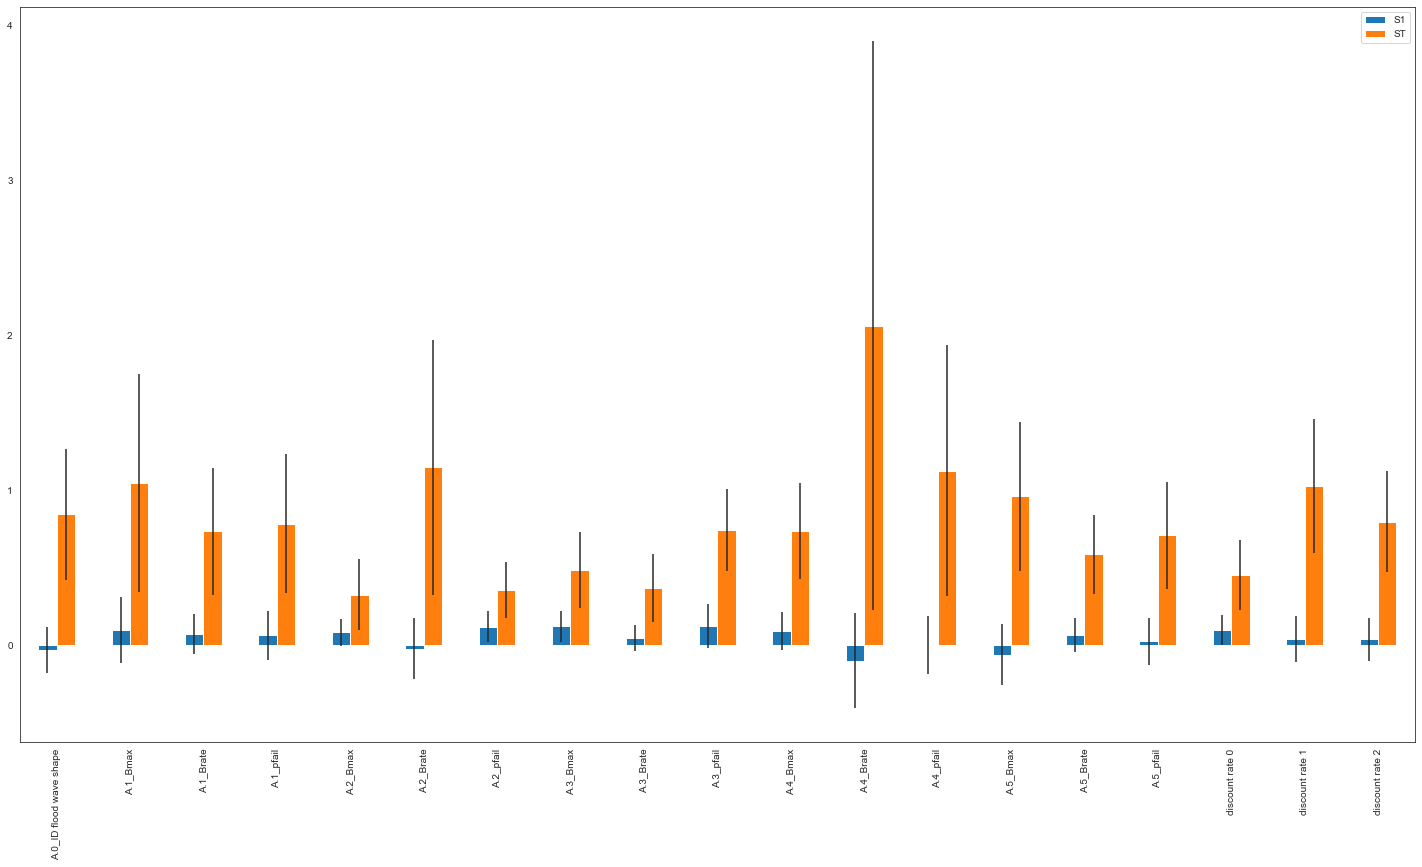

In [61]:
# Calculate scores for outcome "Deventer Expected Number of Deaths 0"
Si = sobol.analyze(problem, outcomes['A.5 Total Costs'],
                   calc_second_order=True, print_to_console=False)

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])


# Plot the related scores
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(25,15)
fig.subplots_adjust(bottom=0.2)
plt.savefig('figures/Global Sensitivity Analysis/GSA_A5 Total Costs.png')

plt.show()

In [43]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si

{'S1': array([ 0.07276508, -0.0498979 , -0.32936415, -0.04944687, -0.07797588,
         0.03345786, -0.14735725, -0.10460046,  0.03052541, -0.00054725,
         0.06208184,  0.07053473, -0.06733293,  0.05040402,  0.07202091,
         0.12446011,  0.08430764, -0.07807423,  0.14042015]),
 'S1_conf': array([0.16393157, 0.17814536, 0.41921754, 0.2598074 , 0.20605683,
        0.21406137, 0.23137662, 0.28273799, 0.22651945, 0.20414372,
        0.1782847 , 0.19138469, 0.23298292, 0.18669634, 0.1933475 ,
        0.12339864, 0.17053912, 0.26076959, 0.15676468]),
 'ST': array([0.20485648, 0.23629362, 2.43253599, 0.57074003, 0.37228439,
        0.31704346, 0.52890854, 0.64190259, 0.48860603, 0.36384573,
        0.28005562, 0.24836141, 0.43533541, 0.29964708, 0.27562597,
        0.13797703, 0.21561064, 0.44577176, 0.22936852]),
 'ST_conf': array([0.14421201, 0.17380804, 2.22110898, 0.47827281, 0.24800364,
        0.19965246, 0.39638082, 0.4601467 , 0.44141166, 0.24390616,
        0.17616805, 0.181

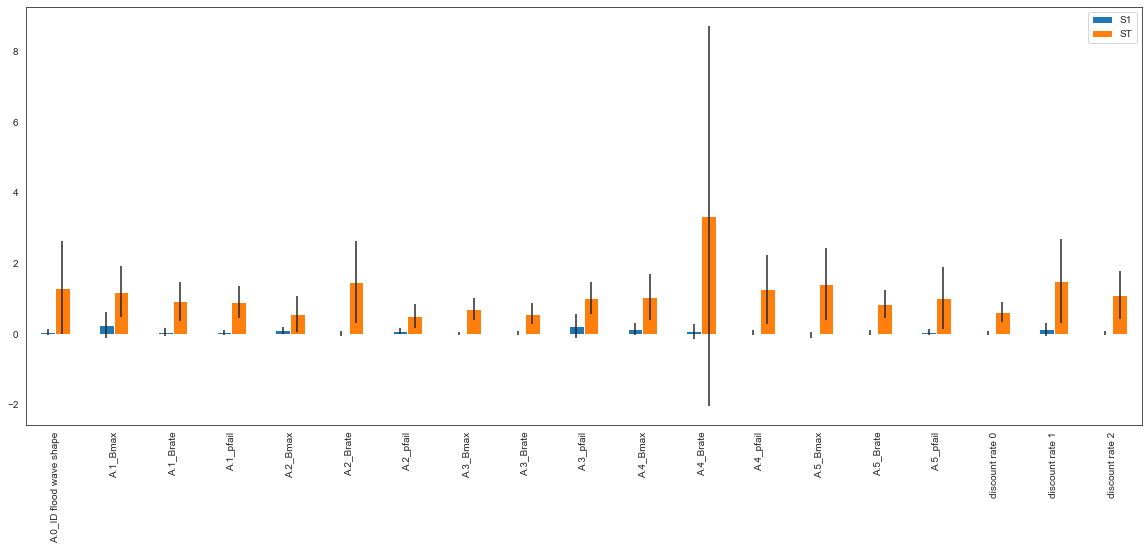

In [62]:
# Calculate scores for outcome "Deventer Expected Number of Deaths 0"

for policy in experiments.policy.unique():
    Si = sobol.analyze(problem, outcomes['A.5_Expected Number of Deaths'])

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

# Plot the related scores
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(20,10)
fig.subplots_adjust(bottom=0.3)
plt.savefig('figures/Global Sensitivity Analysis/GSA_A5 Expected Number of Deaths.png')

plt.show()

#['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 
#'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs',
#'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs']

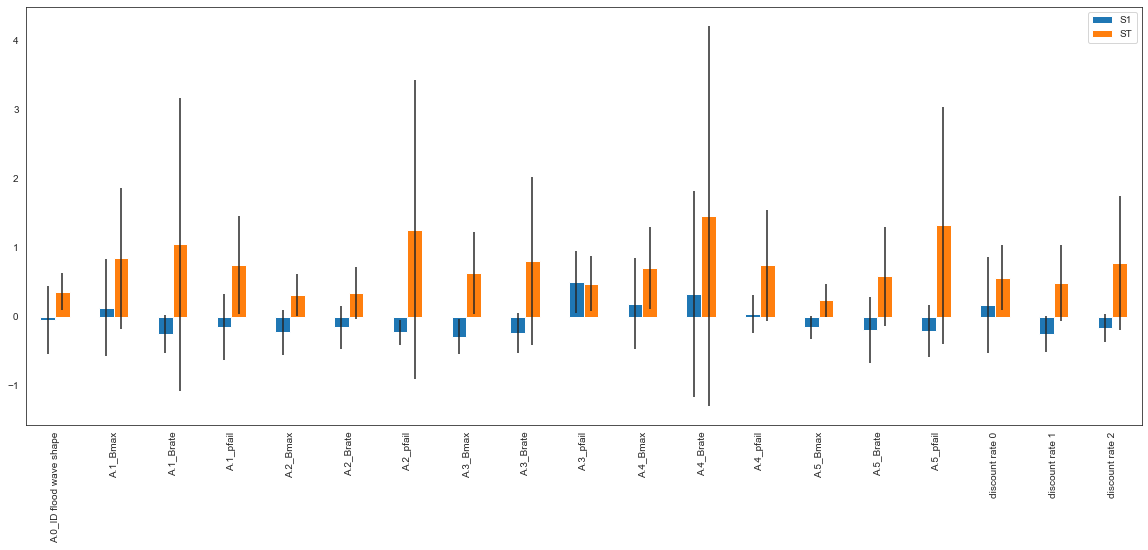

In [47]:
# Calculate scores for outcome "Deventer Dike Investment Costs 0"

for policy in experiments.policy.unique():
    Si = sobol.analyze(problem, outcomes['A.4_Expected Number of Deaths'])

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

# Plot the related scores
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(20,10)
fig.subplots_adjust(bottom=0.3)
plt.savefig('figures/Global Sensitivity Analysis/GSA_A4 Expected Number of Deaths.png')
plt.show()

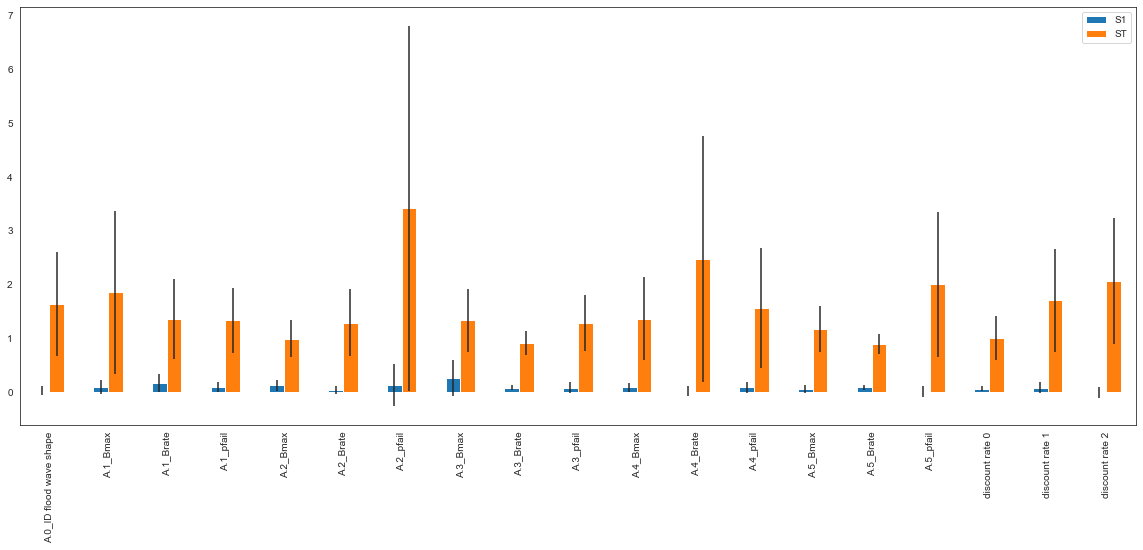

In [65]:

for policy in experiments.policy.unique():
    Si = sobol.analyze(problem, outcomes['Expected Evacuation Costs'])

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

# Plot the related scores
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(20,10)
fig.subplots_adjust(bottom=0.3)
plt.savefig('figures/Global Sensitivity Analysis/Expected Evacuation Costs.png')

plt.show()

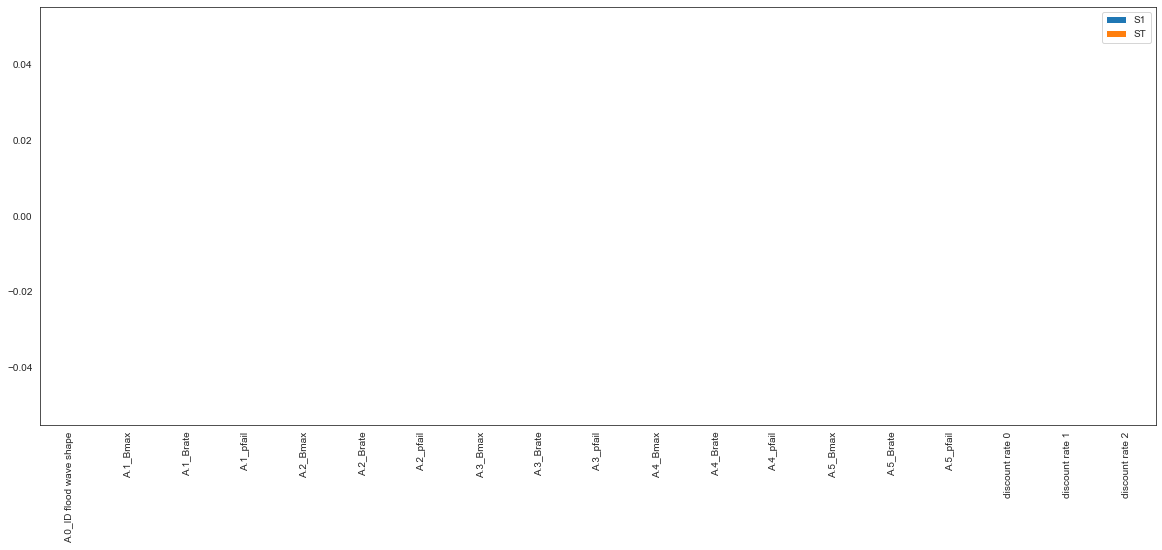

In [66]:

for policy in experiments.policy.unique():
    Si = sobol.analyze(problem, outcomes['RfR Total Costs'])

Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

# Plot the related scores
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(20,10)
fig.subplots_adjust(bottom=0.3)
plt.savefig('figures/Global Sensitivity Analysis/RfR Total Costs.png')

plt.show()